# Area Processing Tutorial

Utility tools, test images are loading correctly.

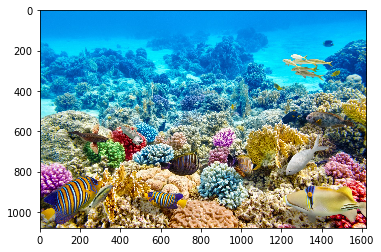

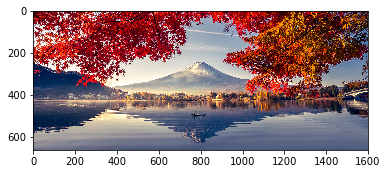

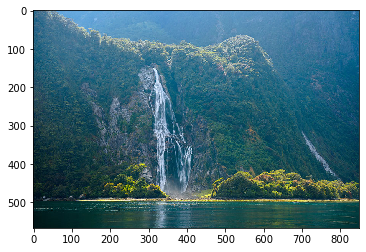

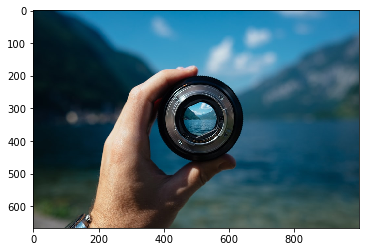

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

images = {}
for x in os.listdir("images"):
    images[x] = cv2.imread("images/" + x)
    temp = images[x][:,:,::-1]
    plt.imshow(temp, interpolation='nearest')
    plt.show()

<b style="font-size:18px;">Exercise 1.1: Sliding Window</b>

Create a function using python that creates an nxn sliding window that strides through an image.

Your function should accept three parameters, an image (to slide through), the n dimension of the window and the stride value s. 
<i style="color:red">(Stride simply refers to the amount of pixels the window moves through kind of like “speed”, for computational purposes in practise we rarely slide the window at a speed of 1 pixel)</i>

The function does not return anything, but internally it should display a matrix of pixel values that displays the current region the sliding window is in. <i style="color:red">(You can also if you want display the sliding window values as an image using cv2.imshow() this could potentially help you debug any errors you might have or show the sliding window moving on the image using cv2.rectange() )</i>


In [2]:
r = plt.imread("images/image4.jpg")
temp = r[:,:,::-1]
#A sliding window has been implemented that goes through a specified image taking the image, 
#the size of the rectangle and the stride value as parameters.

#The window proceeds to go through the range of x and y axis with some speed depending on the value of strideValue.
#A new image is created as a subset of the original image with the rectangle actually marked showing the window, 
#these start showing externally as a new tab and at the end, they are all destroyed by the function destroy all windows.

def SlidingWindow(image, n, strideValue):
    for y in range(0, image.shape[0], strideValue):
        for x in range(0, image.shape[1], strideValue):
            newImage = image.copy()
            cv2.rectangle(newImage, (x, y), (x + n[0], y + n[1]), (255, 0, 0), 3)
            cv2.imshow("Window", newImage)
            cv2.waitKey(1)
    cv2.destroyAllWindows()
     
SlidingWindow(temp, (120, 120), 40)   

<b style="font-size:18px;">Exercise 1.2: Convolution on RoI</b>

Create a function that convolves an nxn region of an image with a Sobel kernel. 

Your function should accept the region of interest (ROI) of the image of nxn dimensions, and a kernel.

In [3]:
#Function which goes through each channel and calculates the filter by first calculating the sum of the image pixels multiplied
#by the kernal, after the sum is multiplied by the weight provided and the filter is returned.
def gothroughChannel(image, kernel, weight):
    [r, c] = np.shape(image)

    filtered = np.zeros(shape=(r-kernel.shape[0], c-kernel.shape[1]))
    for i in range(r - kernel.shape[0]-1):
        for j in range(c - kernel.shape[1]-1):
            g0 = np.sum(np.multiply(image[i:i + kernel.shape[0], j:j + kernel.shape[1]], kernel))  
            filtered[i, j] = g0 * weight
    return filtered

#Convolution function which first breaks down images to the three rgb channels, calls the function gothroughChannel
#for filtering and finally puts the filtered images together and returns the image.

def Convolution(image, kernel, weight):
    
    red = image[:,:,2]
    green = image[:,:,1]
    blue = image[:,:,0]  
    
    sobel1 = gothroughChannel(red, kernel, weight)
    sobel2 = gothroughChannel(green, kernel, weight)
    sobel3 = gothroughChannel(blue, kernel, weight)
    
    filtered_image = np.dstack((sobel1, sobel2, sobel3))
            
          
    return filtered_image

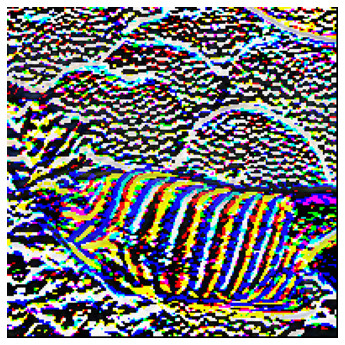

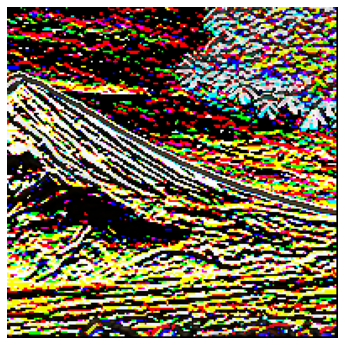

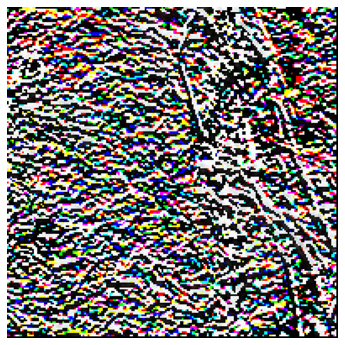

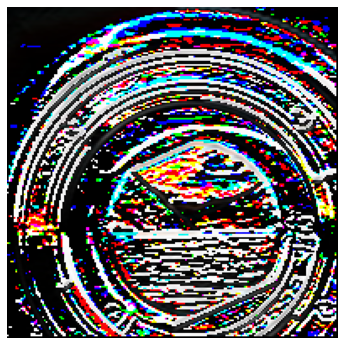

In [4]:
#Load all images and convert to from BGR to RGB
im_bgr1 = plt.imread("images/image1.jpg")
im1 = cv2.cvtColor(im_bgr1, cv2.COLOR_BGR2RGB)
im_bgr2 = plt.imread("images/image2.jpg")
im2 = cv2.cvtColor(im_bgr2, cv2.COLOR_BGR2RGB)
im_bgr3 = plt.imread("images/image3.jpg")
im3 = cv2.cvtColor(im_bgr3, cv2.COLOR_BGR2RGB)
im_bgr4 = plt.imread("images/image4.jpg")
im4 = cv2.cvtColor(im_bgr4, cv2.COLOR_BGR2RGB)

#Using Gy Kernel
Gy = np.array([[1.0, 2.0, 1.0], 
               [0.0, 0.0, 0.0], 
               [-1.0,-2.0,-1.0]])
#Different weights have been tested and 1/8 provides best results for sobel.
Gweight = 1/8

#Run sobel on various parts of each image and add them to a list
MyList = []
MyList.append(Convolution(im1[800:1000, 500:700], Gy, Gweight))
MyList.append(Convolution(im2[200:400, 800:1000], Gy, Gweight))
MyList.append(Convolution(im3[200:400, 200:400], Gy, Gweight))
MyList.append(Convolution(im4[200:400, 400:600], Gy, Gweight))

#Show all images
for x in range(1, 5):
    fig = plt.figure(figsize=(40, 28))
    fig.add_subplot(4, 4, x)
    plt.imshow((MyList[x-1]).astype(np.uint8))
    plt.axis('off')

Display the result for the various images provided on VLE <i style="color:red">(You may start the exercise by converting the image to grayscale, ultimately your function should be able to process RGB Images)<i>

<b style="font-size:18px;">Exercise 1.3: Convolution on the whole image</b>
    
Create a script that uses the sliding window and the convolution functions (Sobel) to convolve a whole image.

The script should output an image displaying the original image and the convolved image.

Use histograms to compare how the intensities of the image has changed.

<i style="color:red">Use the images provided on VLE</i>

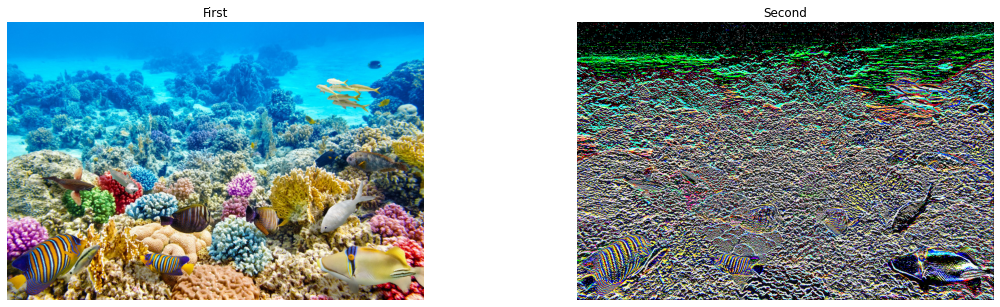

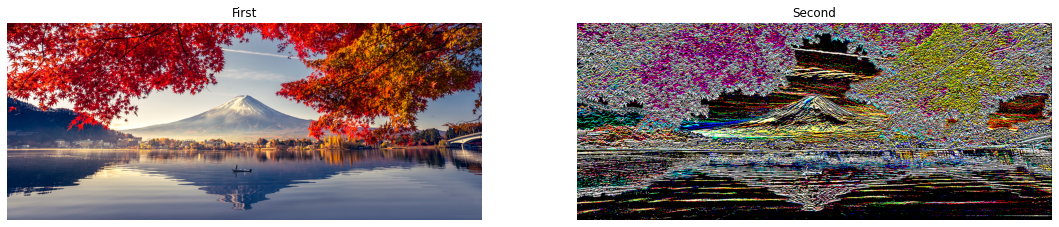

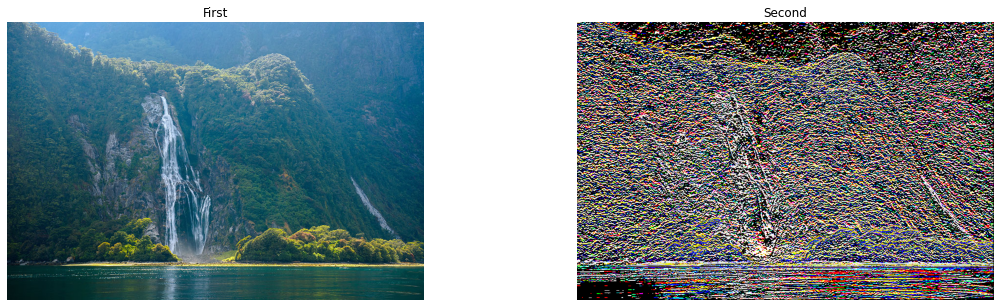

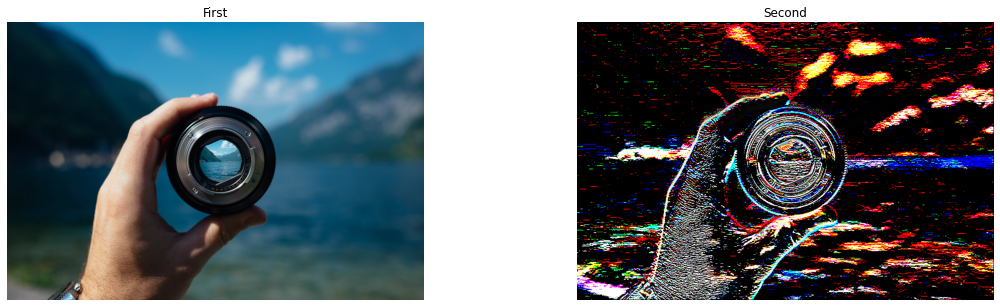

In [5]:
#A list is created which stores the fully (Sobel) convoluted images 
MySobelList = []
MySobelList.append(Convolution(im1, Gy, Gweight))
MySobelList.append(Convolution(im2, Gy, Gweight))
MySobelList.append(Convolution(im3, Gy, Gweight))
MySobelList.append(Convolution(im4, Gy, Gweight))

#A list is created which stores the orginal images (these are shown is BGR format for better display purposes only)
MyOriginalListBGR = []
MyOriginalListBGR.append(im_bgr1)
MyOriginalListBGR.append(im_bgr2)
MyOriginalListBGR.append(im_bgr3)
MyOriginalListBGR.append(im_bgr4)

#Show all images before and after Sobel
for x in range(1, 5):
    fig = plt.figure(figsize=(80, 48))

    fig.add_subplot(8, 8, x)
  
    plt.imshow(MyOriginalListBGR[x-1])
    plt.axis('off')
    plt.title("First")

    fig.add_subplot(8, 8, x+1)
  
    plt.imshow((MySobelList[x-1]).astype(np.uint8))
    plt.axis('off')
    plt.title("Second")

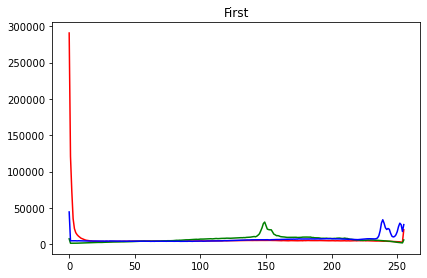

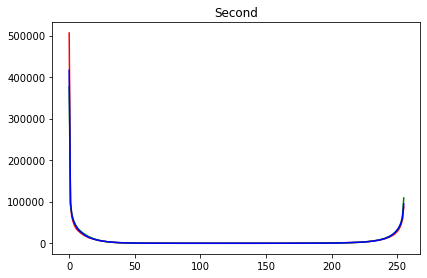

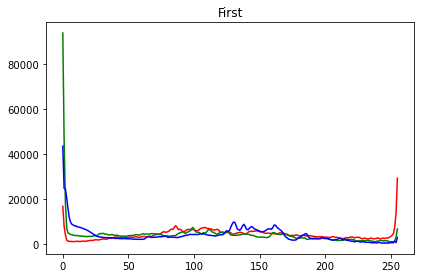

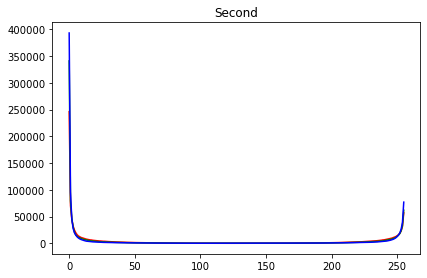

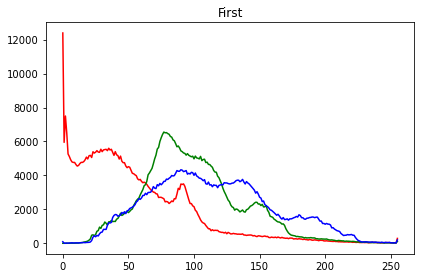

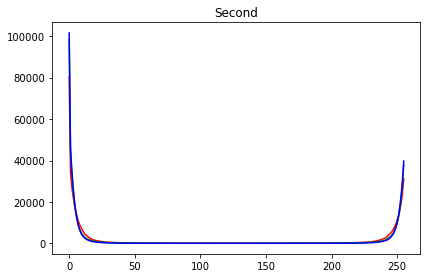

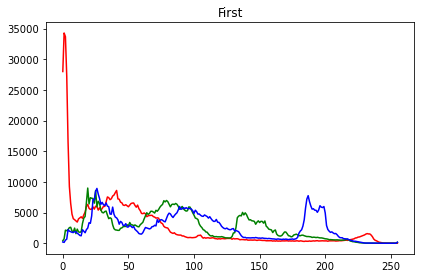

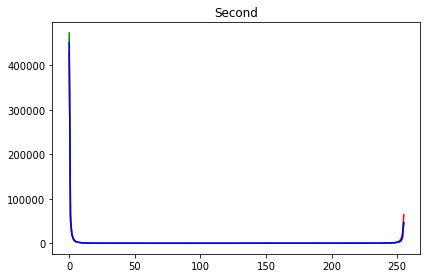

In [21]:
#A list is created which stores the orginal images in RGB format
MyOriginalListRGB = []
MyOriginalListRGB.append(im1)
MyOriginalListRGB.append(im2)
MyOriginalListRGB.append(im3)
MyOriginalListRGB.append(im4)

#Histograms are created using the RGB format for the images before and after convolution,
#Based on the output Sobel seems to work as intended, showing edge detection.

colors = ('r','g','b')
for x in range(1, 5):
    fig = plt.figure(figsize=(62, 40))  
    fig.add_subplot(8, 8, x) 

    for i,color in enumerate(colors):
        hist = cv2.calcHist([MyOriginalListBGR[x-1]],[i],None,[256],[0,256])
        plt.plot(hist,color = color) 
    
    plt.title("First")    
    plt.show()

    fig = plt.figure(figsize=(62, 40)) 
    fig.add_subplot(8, 8, x+1)

    for i,color in enumerate(colors):
        histTwo = cv2.calcHist([MySobelList[x-1].astype(np.uint8)],[i],None,[256],[0,256])
        plt.plot(histTwo, color = color) 
        
    plt.title("Second")    
    plt.show()    

<b style="font-size:18px;">Exercise 1.4: Different Convolution Kernels</b>

Apply Bilinear and Gaussian kernels to the previous exercise. <i style="color:red">(You should have three in total including Sobel)<i>
    
Document the results and compare the effect that the convolution of these kernel has on the image. 
    
You may initially use histograms to compare pixel values and intensity, you should also visually compare the results and discuss what potential effect this might have in terms of feature extraction and/or feature understanding. <i style="color:red">(We know that at this point this is your opinion. We are looking for insights on what you think no answer is completely right or wrong)</i><i style="color:red">
    
<i style="color:red">Use the images provided on VLE</i>

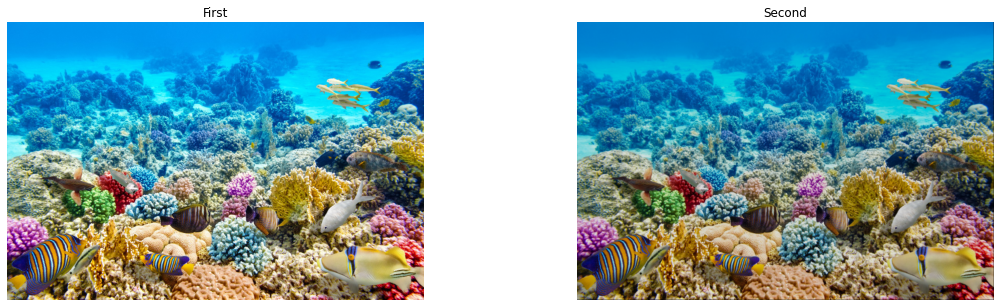

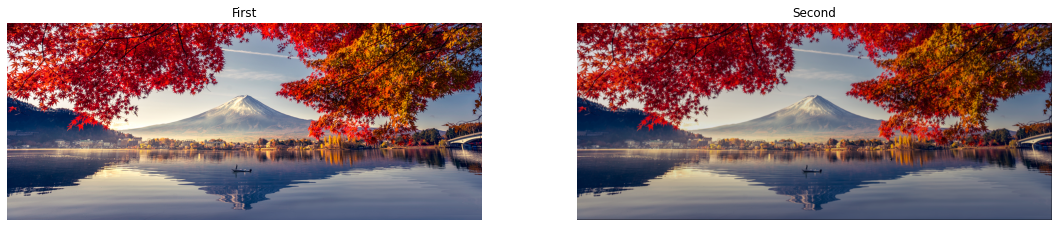

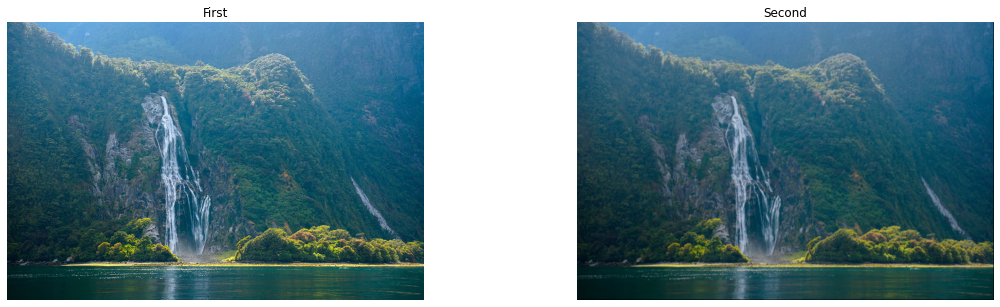

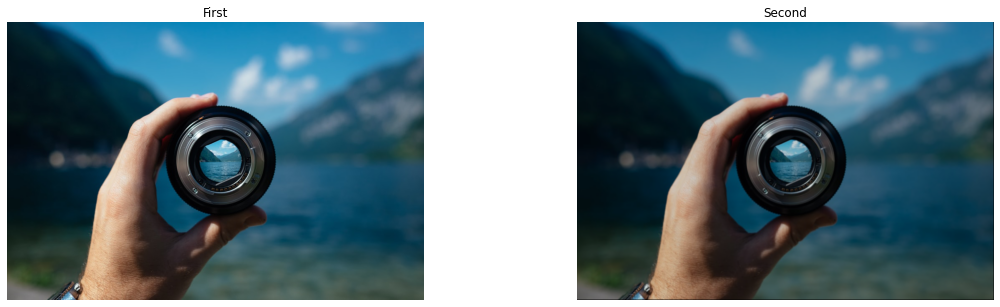

In [16]:
#With regards to bilinear, when the following matrix and weight are used the images seem to give the same output 
#but when the histograms are outputted a difference can be noticed especially for the waterfall image and change in its intensity.
Bilinear = np.array([[1, 2, 1],
                     [1, 4, 1],
                     [1, 2, 1]])
BWeight = 1/16

MyBiLinearList = []
MyBiLinearList.append(Convolution(im1, Bilinear, BWeight))
MyBiLinearList.append(Convolution(im2, Bilinear, BWeight))
MyBiLinearList.append(Convolution(im3, Bilinear, BWeight))
MyBiLinearList.append(Convolution(im4, Bilinear, BWeight))

for x in range(1, 5):
    fig = plt.figure(figsize=(80, 48))

    fig.add_subplot(8, 8, x)
  
    plt.imshow(MyOriginalListBGR[x-1])
    plt.axis('off')
    plt.title("First")

    fig.add_subplot(8, 8, x+1)
  
    plt.imshow((MyBiLinearList[x-1]).astype(np.uint8))
    plt.axis('off')
    plt.title("Second")

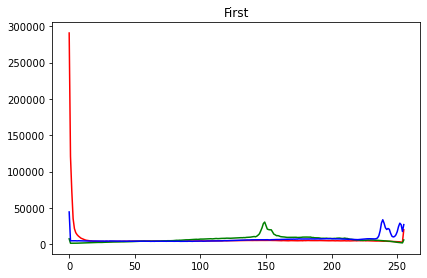

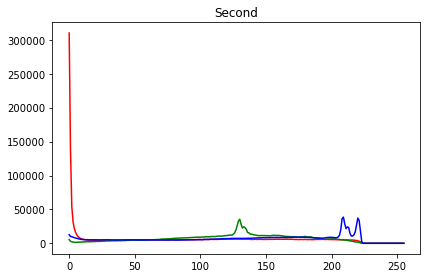

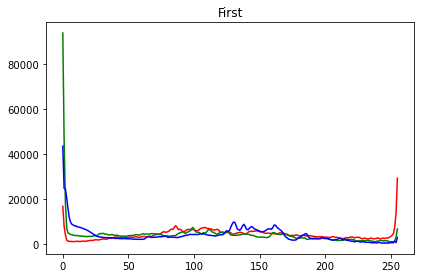

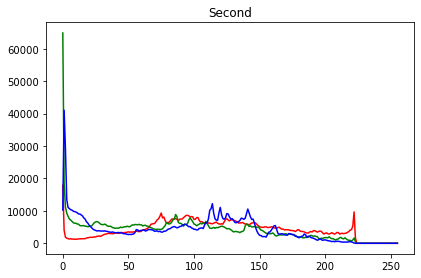

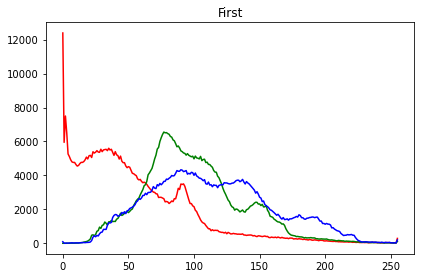

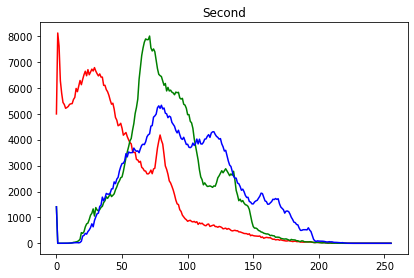

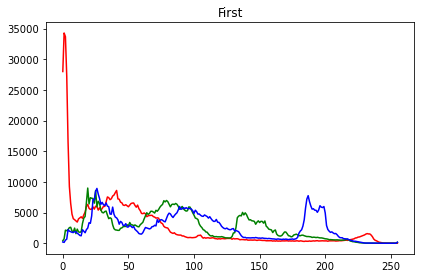

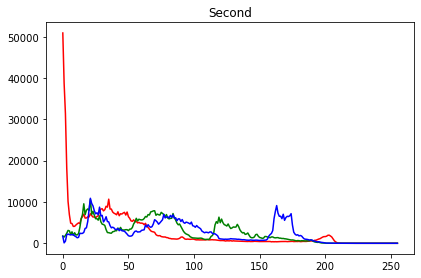

In [19]:
colors = ('r','g','b')
for x in range(1, 5):
    fig = plt.figure(figsize=(62, 40))  
    fig.add_subplot(8, 8, x) 

    for i,color in enumerate(colors):
        hist = cv2.calcHist([MyOriginalListBGR[x-1]],[i],None,[256],[0,256])
        plt.plot(hist,color = color) 
    
    plt.title("First")    
    plt.show()

    # Adds a subplot at the 2nd position
    fig = plt.figure(figsize=(62, 40)) 
    fig.add_subplot(8, 8, x+1)

    for i,color in enumerate(colors):
        histTwo = cv2.calcHist([MyBiLinearList[x-1].astype(np.uint8)],[i],None,[256],[0,256])
        plt.plot(histTwo, color = color) 
        
    plt.title("Second")    
    plt.show()


In [9]:
#The following function calculates the size of the Kernel for the Gaussian filter, 
#with regards to gaussian a small kernel was first tested but not significant blurring effects where taking place,
#so a kernal size of 41x41, (sigma = 5) with a Weight of one was used which had the best effect.
def makeGaussian(sigma): 
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    Gauss = np.zeros((filter_size, filter_size), np.float32)
    
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            Gauss[x+m, y+n] = (1/x1)*x2
    return(Gauss)

(41, 41)


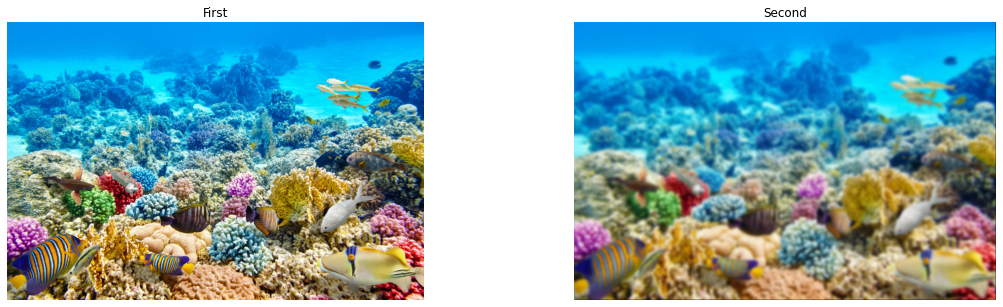

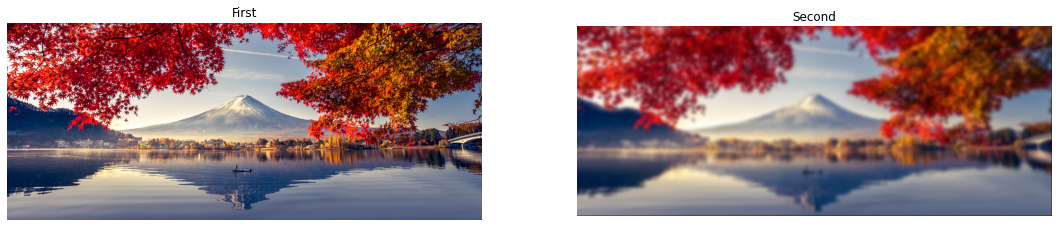

In [11]:
Gaussian = makeGaussian(5)
print(Gaussian.shape)
GWeight = 1

MyGaussian = []
MyGaussian.append(Convolution(im1, Gaussian, GWeight))
MyGaussian.append(Convolution(im2, Gaussian, GWeight))
MyGaussian.append(Convolution(im3, Gaussian, GWeight))
MyGaussian.append(Convolution(im4, Gaussian, GWeight))

for x in range(1, 5):
    fig = plt.figure(figsize=(80, 48))

    fig.add_subplot(8, 8, x)
  
    plt.imshow(MyOriginalListBGR[x-1])
    plt.axis('off')
    plt.title("First")

    fig.add_subplot(8, 8, x+1)
  
    plt.imshow((MyGaussian[x-1]).astype(np.uint8))
    plt.axis('off')
    plt.title("Second")

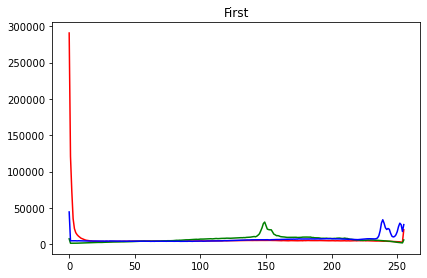

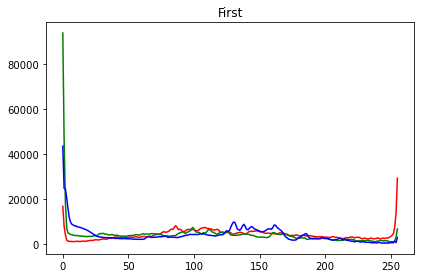

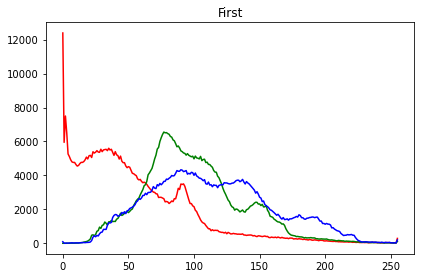

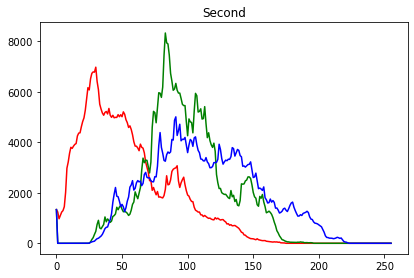

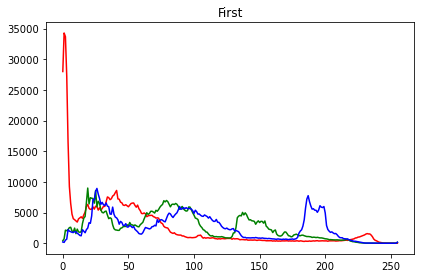

In [20]:
colors = ('r','g','b')
for x in range(1, 5):
    fig = plt.figure(figsize=(62, 40))  
    fig.add_subplot(8, 8, x) 

    for i,color in enumerate(colors):
        hist = cv2.calcHist([MyOriginalListBGR[x-1]],[i],None,[256],[0,256])
        plt.plot(hist,color = color) 
    
    plt.title("First")    
    plt.show()

    # Adds a subplot at the 2nd position
    fig = plt.figure(figsize=(62, 40)) 
    fig.add_subplot(8, 8, x+1)

    for i,color in enumerate(colors):
        histTwo = cv2.calcHist([MyGaussian[x-1].astype(np.uint8)],[i],None,[256],[0,256])
        plt.plot(histTwo, color = color) 
        
    plt.title("Second")    
    plt.show()

With regards tp feature extraction and/or feature understanding, from tests done, sobel kernel seems to be the best at feature extraction due edges it starts showcasing, with the second image for example (the mountain image) the mountain edge is clearly captivated so this would be idle for extraction.

Guassian blurs an image so it might not be as good as extracting as sobel (or not worth while entirely).
Finally for the bilinear one, due the intesity shifting a larger kernel might lead to promissing feature extraction/understanding, but this wasnt tested properly so its entirely speculation.